### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
#%pip install matplotlib seaborn pandas numpy
#%pip install ydata-profiling
#%pip install ipywidgets

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#rename columns if necessary (e.g. misspellings)
data.rename(columns={'passanger': 'passenger'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [ ]:
# Use profileReport to generate a summary of the dataset
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_notebook_iframe()
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 26/26 [00:00<00:00, 60.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
data2 = data.drop('car', axis=1).dropna() #drop column 'car' (not very useful since there are a lot of blank entries) and rows with missing values; Okay for this analysis since the dataset is large enough and the volume of missing data is small

4. What proportion of the total observations chose to accept the coupon?



In [ ]:
print(f"The proportion of total observations who chose to accept the coupon is: {(data2['Y'] == 1).mean():.3f}") #more efficient way to calculate proportion

The proportion of total observations who chose to accept the coupon is: 0.569


5. Use a bar plot to visualize the `coupon` column.

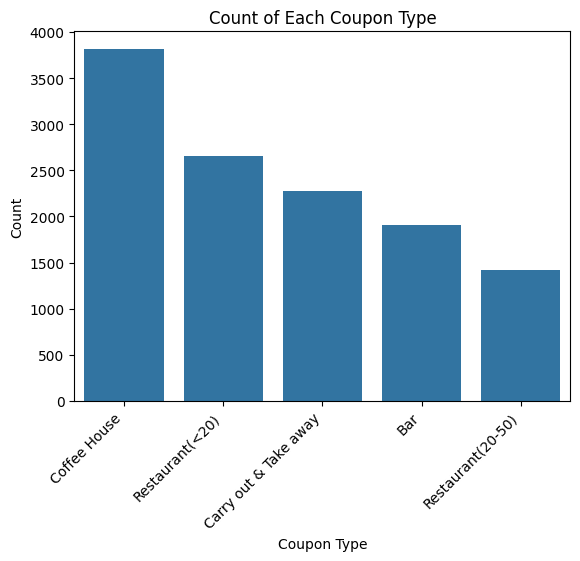

In [7]:
sns.countplot(data=data2, x='coupon', order=data2['coupon'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Each Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

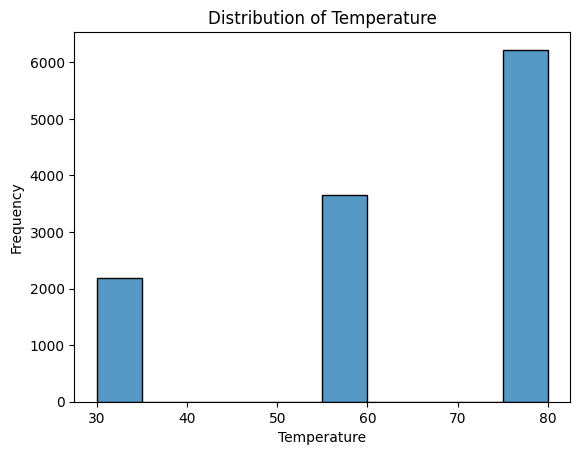

In [8]:
sns.histplot(data=data2, x='temperature', bins=10)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
data_baronly = data2[data2['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [12]:
print(f"The proportion of bar coupons that were accepted is: {(data_baronly['Y'] == 1).mean():.3f}")

The proportion of bar coupons that were accepted is: 0.412


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
bar_3orfewer = ['never', 'less1', '1~3']
bar_4plus = ['4~8', 'gt8']
prop_bar_3orfewer = data_baronly[data_baronly['Bar'].isin(bar_3orfewer)]['Y'].mean() #proportion of accepted coupons for people who go to bar 3 or fewer times a month
prop_bar_4plus = data_baronly[data_baronly['Bar'].isin(bar_4plus)]['Y'].mean() #proportion of accepted coupons for people who go to bar 4 or more times a month

print(f"The proportion of accepted coupons for people who go to bar 3 or fewer times a month is: {prop_bar_3orfewer:.3f}")
print(f"The proportion of accepted coupons for people who go to bar 4 or more times a month is: {prop_bar_4plus:.3f}")


The proportion of accepted coupons for people who go to bar 3 or fewer times a month is: 0.373
The proportion of accepted coupons for people who go to bar 4 or more times a month is: 0.762


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
age_under25 = ['below21', '21']
age_over25 = ['26', '31', '36', '41', '46', '50plus']
bar_1plus = ['1~3', '4~8', 'gt8']

#prop_age_under25 = data_baronly[data_baronly['age'].isin(age_under25) & data_baronly['Bar'].isin(bar_1plus)]['Y'].mean() #proportion of accepted coupons for people under 25 who go to bar 1 or more times a month

prop_Q4_age_over25 = data_baronly[data_baronly['age'].isin(age_over25) & data_baronly['Bar'].isin(bar_1plus)]['Y'].mean() #proportion of accepted coupons for people over 25 who go to bar 1 or more times a month

data2_Q4_allothers = data2.drop(data_baronly[data_baronly['age'].isin(age_over25) & data_baronly['Bar'].isin(bar_1plus)].index) #drop people over 25 who go to bar 1 or more times a month
prop_Q4_allothers = data2_Q4_allothers['Y'].mean() #proportion of accepted coupons for everyone else

print(f"The proportion of accepted coupons for people over 25 who go to a bar 1 or more times a month is: {prop_Q4_age_over25:.3f}")
print(f"The proportion of accepted coupons for everyone else is: {prop_Q4_allothers:.3f}")


#print(f"The proportion of accepted coupons for people under 25 who go to a bar 1 or more times a month is: {prop_age_under25:.3f}")  
print("The proportion of accepted coupons for people over 25 who go to bars 1 or more times a month is higher than the proportion of accepted coupons for everyone else in the dataset.")  

The proportion of accepted coupons for people over 25 who go to a bar 1 or more times a month is: 0.690
The proportion of accepted coupons for everyone else is: 0.565
The proportion of accepted coupons for people over 25 who go to bars 1 or more times a month is higher than the proportion of accepted coupons for everyone else in the dataset.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [29]:
passenger_Q5 = ['Friend(s)', 'Partner'] #exclude kids and "alone"
prop_Q5 = data_baronly[(data_baronly['occupation'] !='Farming Fishing & Forestry') & data_baronly['Bar'].isin(bar_1plus) & data_baronly['passenger'].isin(passenger_Q5)]['Y'].mean() #proportion of accepted coupons for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
data2_Q5_allothers = data2.drop(data_baronly[(data_baronly['occupation'] !='Farming Fishing & Forestry') & data_baronly['Bar'].isin(bar_1plus) & data_baronly['passenger'].isin(passenger_Q5)].index) #drop people who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
prop_Q5_allothers = data2_Q5_allothers['Y'].mean() #proportion of accepted coupons for everyone else

print(f"The proportion of accepted coupons for people who go to bars 1 or more times a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is: {prop_Q5:.3f}")
print(f"The proportion of accepted coupons for everyone else is: {prop_Q5_allothers:.3f}")


The proportion of accepted coupons for people who go to bars 1 or more times a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is: 0.714
The proportion of accepted coupons for everyone else is: 0.567


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [35]:
passenger_Q6 = ['Friend(s)', 'Partner'] #exclude kids and "alone"
age_under30 = ['below21', '21', '26']
cheaprestaurant_4ormore = ['4~8', 'gt8']
income_lessthan50k = ['$25000 - $37499', '$37500 - $49999', 'Less than $12500', '$12500 - $24999']
prop_Q6_1 = data_baronly[data_baronly['Bar'].isin(bar_1plus) & data_baronly['passenger'].isin(passenger_Q5) & (data_baronly['maritalStatus'] != 'Widowed')]['Y'].mean() #proportion of accepted coupons for people who go to bars more than once a month, had passengers that were not a kid, and are not widowed.
prop_Q6_2 = data_baronly[data_baronly['Bar'].isin(bar_1plus) & data_baronly['age'].isin(age_under30)]['Y'].mean() #proportion of accepted coupons for people who go to bars more than once a month and are under the age of 30.
prop_Q6_3 = data_baronly[data_baronly['RestaurantLessThan20'].isin(cheaprestaurant_4ormore) & data_baronly['income'].isin(income_lessthan50k)]['Y'].mean() #proportion of accepted coupons for people who go to cheap restaurants 4 or more times a month and have an income of less than $50,000.

print(f"The proportion of accepted coupons for people who go to bars 1 or more times a month, had passengers that were not a kid, and are not widowed is: {prop_Q6_1:.3f}")
print(f"The proportion of accepted coupons for people who go to bars 1 or more times a month and are under the age of 30 is: {prop_Q6_2:.3f}")
print(f"The proportion of accepted coupons for people who go to cheap restaurants 4 or more times a month and have an income of less than $50,000 is: {prop_Q6_3:.3f}")


The proportion of accepted coupons for people who go to bars 1 or more times a month, had passengers that were not a kid, and are not widowed is: 0.714
The proportion of accepted coupons for people who go to bars 1 or more times a month and are under the age of 30 is: 0.720
The proportion of accepted coupons for people who go to cheap restaurants 4 or more times a month and have an income of less than $50,000 is: 0.456


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [2]:
print("In general, it seems like people who go to bars more frequently (at least once a month) are more likely to accept bar coupons." \
"\nAdditionally, people who go to cheap restaurants more frequently and have lower incomes also seem more likely to accept bar coupons." \
"\nSocial factors, such as having friends or partners as passengers, also appear to increase the likelihood of accepting bar coupons." \
"\nOverall, frequent social outings and certain demographic factors seem to influence the acceptance of bar coupons.")

In general, it seems like people who go to bars more frequently (at least once a month) are more likely to accept bar coupons.
Additionally, people who go to cheap restaurants more frequently and have lower incomes also seem more likely to accept bar coupons.
Social factors, such as having friends or partners as passengers, also appear to increase the likelihood of accepting bar coupons.
Overall, frequent social outings and certain demographic factors seem to influence the acceptance of bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
#subset the original dataframe to only focus on coffeehouse coupons
data_coffeehouse = data2[data2['coupon'] == 'Coffee House']

In [ ]:
#calculate overall average proportion of accepted coffee house coupons
prop_coffeehouse_overall = (data_coffeehouse['Y'] == 1).mean()

# define column filters based on: coffeehouse frequency, occupation, age and income
coffeehouse_3orfewer = ['never', 'less1', '1~3']
coffeehouse_4plus = ['4~8', 'gt8']

coffeehouse_occupation_notworking = ['unemployed', 'Retired'] #segment for people not working vs working/students

coffeehouse_under30 = ['below21', '21', '26']
coffeehouse_30over = ['31', '36', '41', '46', '50plus']

income_lessthan50k = ['$25000 - $37499', '$37500 - $49999', 'Less than $12500', '$12500 - $24999'] #segment for people with income less than 50k vs 50k and above
income_50kormore = ['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']

#calculate proportion of accepted coffee house coupons for people who go to coffee houses frequently (4 or more times a month) vs 3 or fewer times a month
prop_3orfewer = data_coffeehouse[data_coffeehouse['CoffeeHouse'].isin(coffeehouse_3orfewer)]['Y'].mean()
prop_4plus = data_coffeehouse[data_coffeehouse['CoffeeHouse'].isin(coffeehouse_4plus)]['Y'].mean()

#calculate proportion of accepted coffee house coupons for people who are working/students vs not working
prop_occupation_notworking = data_coffeehouse[data_coffeehouse['occupation'].isin(coffeehouse_occupation_notworking)]['Y'].mean()
prop_occupation_working = data_coffeehouse[~data_coffeehouse['occupation'].isin(coffeehouse_occupation_notworking)]['Y'].mean()

#calculate proportion of accepted coffee house coupons for people under 30 vs 30 and over
prop_age_under30 = data_coffeehouse[data_coffeehouse['age'].isin(coffeehouse_under30)]['Y'].mean()
prop_age_30over = data_coffeehouse[data_coffeehouse['age'].isin(coffeehouse_30over)]['Y'].mean()

#calculate proportion of accepted coffee house coupons for people with income less than 50k vs 50k and above
prop_income_lessthan50k = data_coffeehouse[data_coffeehouse['income'].isin(income_lessthan50k)]['Y'].mean()
prop_income_50kormore = data_coffeehouse[data_coffeehouse['income'].isin(income_50kormore)]['Y'].mean()

#calculate proportion of accepted coffee house coupons for people who drink coffee frequently (4 or more times a month), are working/students, are 30 and under, and have income of less than 50k
prop_combofilters_1 = data_coffeehouse[
    (data_coffeehouse['CoffeeHouse'].isin(coffeehouse_4plus)) &
    (~data_coffeehouse['occupation'].isin(coffeehouse_occupation_notworking)) &
    (data_coffeehouse['age'].isin(coffeehouse_under30)) &
    (data_coffeehouse['income'].isin(income_lessthan50k))
]['Y'].mean()

combofilters_1_index = data_coffeehouse[
    (data_coffeehouse['CoffeeHouse'].isin(coffeehouse_4plus)) &
    (~data_coffeehouse['occupation'].isin(coffeehouse_occupation_notworking)) &
    (data_coffeehouse['age'].isin(coffeehouse_under30)) &
    (data_coffeehouse['income'].isin(income_lessthan50k))
].index

data_coffeehouse_combofilters_1_allothers = data_coffeehouse.drop(combofilters_1_index) #drop people who drink coffee frequently (4 or more times a month), are working/students, are 30 and under, and have income of less than 50k
prop_combofilters_1_allothers = data_coffeehouse_combofilters_1_allothers['Y'].mean() #proportion of accepted coffee house coupons for everyone else exclusive of the above "combo filter 1" group

In [3]:
print("The following provides a summary of proportions of accepted coffee house coupons for various segments of the data:")
print(f'The overall proportion of accepted coffee house coupons is: {prop_coffeehouse_overall:.3f}')
print(f'The proportion of accepted coffee house coupons for people who go to coffee houses 3 or fewer times a month is: {prop_3orfewer:.3f}')
print(f'The proportion of accepted coffee house coupons for people who go to coffee houses 4 or more times a month is: {prop_4plus:.3f}')
print(f'The proportion of accepted coffee house coupons for people who are not working is: {prop_occupation_notworking:.3f}')
print(f'The proportion of accepted coffee house coupons for people who are working/students is: {prop_occupation_working:.3f}')
print(f'The proportion of accepted coffee house coupons for people who are under 30 is: {prop_age_under30:.3f}')
print(f'The proportion of accepted coffee house coupons for people who are 30 and over is: {prop_age_30over:.3f}')
print(f'The proportion of accepted coffee house coupons for people with income less than 50k is: {prop_income_lessthan50k:.3f}')
print(f'The proportion of accepted coffee house coupons for people with income of 50k or more is: {prop_income_50kormore:.3f}')
print()
print("Among the various segments analyzed, it appears that people who drink coffee frequently (4 or more times a month), are working/students, are 30 and under, and have income of less than 50k have the highest proportion of accepted coffee house coupons." \
"\nTherefore, the proportion of accepted coffee house coupons for this specific group is highlighted below, along with the proportion for everyone else exclusive of this group.")
print()
print(f'The proportion of accepted coffee house coupons for people who drink coffee frequently (4 or more times a month), are working/students, are 30 and under, and have income of less than 50k is: {prop_combofilters_1:.3f}')
print(f'The proportion of accepted coffee house coupons for everyone else exclusive of the above group, amongst those who accepted a coffee coupon, is: {prop_combofilters_1_allothers:.3f}')


The following provides a summary of proportions of accepted coffee house coupons for various segments of the data:


NameError: name 'prop_coffeehouse_overall' is not defined